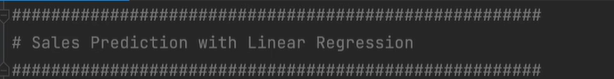

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split ,cross_val_score

In [62]:


def load():
    data = pd.read_csv("../datasets/advertising.csv")
    return data


df = load()
df.head()



,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [34]:
df.shape

(200, 4)

In [35]:
X = df[["TV"]]
Y = df[["sales"]]


In [36]:
reg_model = LinearRegression().fit(X,Y)

In [38]:
#sabit
reg_model.intercept_[0]

np.float64(7.032593549127695)

In [39]:
# Kat Sayı
reg_model.coef_[0][0]

np.float64(0.04753664043301975)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


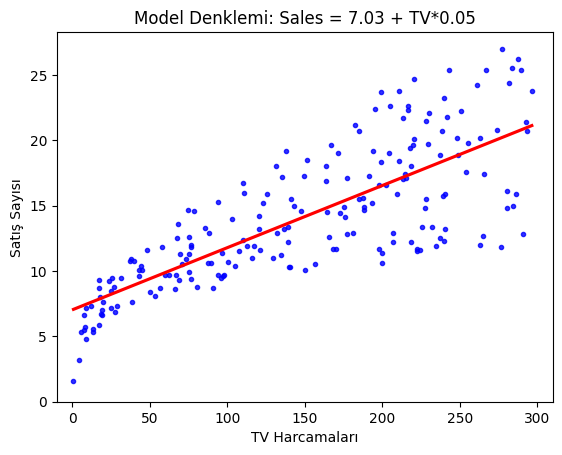

In [47]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=Y, scatter_kws={'color': 'b', 's': 9}, ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


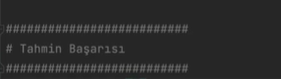

In [57]:
y_pred=reg_model.predict(X)
#MSE
mean_squared_error(Y,y_pred)

np.float64(10.512652915656757)

In [58]:
#RMSE

np.sqrt(mean_squared_error(Y,y_pred))

np.float64(3.2423221486546887)

In [59]:
#MAE
mean_absolute_error(Y,y_pred)

np.float64(2.549806038927486)

In [60]:
''' # R-KARE değişkendeki toplam değişkenliği
    ne kadar iyi açıkladığını gösteren bir değerlendirme ölçüsüdür.
    Kısaca, modelin ne kadar iyi uyum sağladığını ifade eder.'''

reg_model.score(X,Y)

0.611875050850071

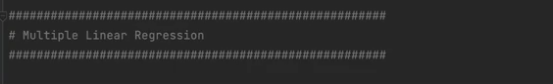

In [64]:
df = load()

In [65]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [68]:
X = df.drop('sales',axis = 1)
X.head()

,TV,radio,newspaper
0,230.10,37.80,69.20
1,44.50,39.30,45.10
2,17.20,45.90,69.30
3,151.50,41.30,58.50
4,180.80,10.80,58.40


In [70]:
y = df[['sales']]

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size=0.20,random_state=1)

In [72]:
X_train.shape

(160, 3)

In [73]:
X_test.shape

(40, 3)

In [76]:
reg_model = LinearRegression()

In [77]:
reg_model.fit(X_train , y_train)

LinearRegression()

In [78]:
reg_model.intercept_[0]

np.float64(2.907947020816433)

In [80]:
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

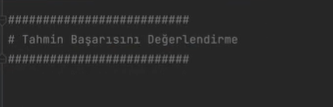

In [83]:
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

np.float64(1.736902590147092)

In [85]:
# Train RKare
reg_model.score(X_test,y_test)

0.8927605914615384

In [86]:
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(1.4113417558581587)

In [87]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

np.float64(1.6913531708051797)